In [9]:
import pandas as pd
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [3]:
data = pd.read_csv('phishing_dataset/phishing.csv')
data.head()

Index  UsingIP  LongURL  ShortURL  Symbol@  Redirecting//  PrefixSuffix-  \
0      0        1        1         1        1              1             -1   
1      1        1        0         1        1              1             -1   
2      2        1        0         1        1              1             -1   
3      3        1        0        -1        1              1             -1   
4      4       -1        0        -1        1             -1             -1   

   SubDomains  HTTPS  DomainRegLen  ...  UsingPopupWindow  IframeRedirection  \
0           0      1            -1  ...                 1                  1   
1          -1     -1            -1  ...                 1                  1   
2          -1     -1             1  ...                 1                  1   
3           1      1            -1  ...                -1                  1   
4           1      1            -1  ...                 1                  1   

   AgeofDomain  DNSRecording  WebsiteTraffic  PageRank  GoogleIndex  \
0           -1            -1               0        -1            1   
1            1            -1               1        -1            1   
2           -1            -1               1        -1            1   
3           -1            -1               0        -1            1   
4            1             1               1        -1            1   

   LinksPointingToPage  StatsReport  class  
0                    1            1     -1  
1                    0           -1     -1  
2                   -1            1     -1  
3                    1            1      1  
4                   -1           -1      1  

[5 rows x 32 columns]

In [4]:
# dropping columns to make this datset more concise
cols_to_drop = [
    'LongURL',
    'SubDomains',
    'HTTPS',
    'AnchorURL'
]

data = data.drop(columns=cols_to_drop)
data = data.replace(-1, 0)
data = data.sample(frac=1.0)
data.head()

Index  UsingIP  ShortURL  Symbol@  Redirecting//  PrefixSuffix-  \
4582   4582        1         1        1              1              0   
9646   9646        1         1        0              1              0   
2903   2903        1         1        1              1              1   
4547   4547        1         1        1              1              0   
684     684        1         1        1              1              0   

      DomainRegLen  Favicon  NonStdPort  HTTPSDomainURL  ...  \
4582             1        1           1               1  ...   
9646             0        1           1               1  ...   
2903             1        1           1               1  ...   
4547             1        1           1               1  ...   
684              0        0           0               1  ...   

      UsingPopupWindow  IframeRedirection  AgeofDomain  DNSRecording  \
4582                 1                  1            0             0   
9646                 1                  1            1             1   
2903                 1                  1            1             0   
4547                 1                  1            1             1   
684                  1                  1            0             1   

      WebsiteTraffic  PageRank  GoogleIndex  LinksPointingToPage  StatsReport  \
4582               0         0            1                    0            1   
9646               1         0            0                    0            1   
2903               1         0            1                    0            1   
4547               0         0            0                    0            1   
684                1         1            1                    0            0   

      class  
4582      0  
9646      1  
2903      1  
4547      0  
684       1  

[5 rows x 28 columns]

In [24]:
# reproducing multiple versions of the dataset with varying size
data_small = data[['PrefixSuffix-', 'DomainRegLen', 'RequestURL', 'LinksInScriptTags',
       'ServerFormHandler', 'WebsiteTraffic', 'GoogleIndex', 'class']]
data_medium = data[['PrefixSuffix-', 'DomainRegLen', 'RequestURL', 'LinksInScriptTags',
       'ServerFormHandler', 'WebsiteTraffic', 'GoogleIndex', 'class']]

# data_small = data[['PrefixSuffix-', 'DomainRegLen', 'RequestURL', 'class']]
data_small = data_small[0:30]
data_medium = data_medium[0:300]
data_small

PrefixSuffix-  DomainRegLen  RequestURL  LinksInScriptTags  \
4582               0             1           1                  0   
9646               0             0           1                  0   
2903               1             1           0                  1   
4547               0             1           0                  0   
684                0             0           1                  0   
2820               0             0           1                  0   
1734               1             0           1                  0   
763                0             0           1                  0   
774                0             1           0                  0   
2907               0             0           0                  1   
5253               0             0           0                  0   
3577               1             0           1                  1   
7226               0             0           1                  0   
9621               0             1           1                  0   
6709               0             0           1                  0   
3428               0             0           0                  0   
5612               0             0           1                  0   
4405               0             1           0                  0   
6939               0             1           0                  0   
6140               0             1           0                  0   
7033               0             1           0                  0   
9277               0             0           0                  1   
6014               0             0           1                  0   
5245               0             0           0                  0   
718                0             1           0                  0   
10063              0             0           1                  1   
1060               1             1           0                  1   
6774               0             1           0                  0   
4256               0             0           1                  0   
2967               0             0           1                  0   

       ServerFormHandler  WebsiteTraffic  GoogleIndex  class  
4582                   0               0            1      0  
9646                   1               1            0      1  
2903                   0               1            1      1  
4547                   0               0            0      0  
684                    1               1            1      1  
2820                   0               1            1      1  
1734                   1               1            1      1  
763                    0               0            1      0  
774                    0               0            0      0  
2907                   0               0            1      0  
5253                   0               1            1      0  
3577                   0               1            1      1  
7226                   0               0            0      0  
9621                   0               1            1      0  
6709                   0               0            1      1  
3428                   0               0            1      0  
5612                   0               0            1      0  
4405                   0               1            1      1  
6939                   0               1            1      0  
6140                   0               0            1      1  
7033                   0               1            1      1  
9277                   1               0            1      1  
6014                   0               0            1      0  
5245                   0               1            1      0  
718                    0               0            1      0  
10063                  1               0            1      1  
1060                   0               1            1      1  
6774                   0               0            1      0  
4256                   0               1

In [38]:
X_s = data_small[['PrefixSuffix-', 'DomainRegLen', 'RequestURL', 'LinksInScriptTags',
       'ServerFormHandler', 'WebsiteTraffic', 'GoogleIndex']]
# X = data_small[['PrefixSuffix-', 'DomainRegLen', 'RequestURL']]
y_s = data_small[['class']]

X_train_s = X_s[0:30]
y_train_s = y_s[0:30]

X_train_s

PrefixSuffix-  DomainRegLen  RequestURL  LinksInScriptTags  \
4582               0             1           1                  0   
9646               0             0           1                  0   
2903               1             1           0                  1   
4547               0             1           0                  0   
684                0             0           1                  0   
2820               0             0           1                  0   
1734               1             0           1                  0   
763                0             0           1                  0   
774                0             1           0                  0   
2907               0             0           0                  1   
5253               0             0           0                  0   
3577               1             0           1                  1   
7226               0             0           1                  0   
9621               0             1           1                  0   
6709               0             0           1                  0   
3428               0             0           0                  0   
5612               0             0           1                  0   
4405               0             1           0                  0   
6939               0             1           0                  0   
6140               0             1           0                  0   
7033               0             1           0                  0   
9277               0             0           0                  1   
6014               0             0           1                  0   
5245               0             0           0                  0   
718                0             1           0                  0   
10063              0             0           1                  1   
1060               1             1           0                  1   
6774               0             1           0                  0   
4256               0             0           1                  0   
2967               0             0           1                  0   

       ServerFormHandler  WebsiteTraffic  GoogleIndex  
4582                   0               0            1  
9646                   1               1            0  
2903                   0               1            1  
4547                   0               0            0  
684                    1               1            1  
2820                   0               1            1  
1734                   1               1            1  
763                    0               0            1  
774                    0               0            0  
2907                   0               0            1  
5253                   0               1            1  
3577                   0               1            1  
7226                   0               0            0  
9621                   0               1            1  
6709                   0               0            1  
3428                   0               0            1  
5612                   0               0            1  
4405                   0               1            1  
6939                   0               1            1  
6140                   0               0            1  
7033                   0               1            1  
9277                   1               0            1  
6014                   0               0            1  
5245                   0               1            1  
718                    0               0            1  
10063                  1               0            1  
1060                   0               1            1  
6774                   0               0            1  
4256                   0               1            1  
2967                   0               0            1

In [26]:
# validation testing data
X_medium = data_medium[['PrefixSuffix-', 'DomainRegLen', 'RequestURL', 'LinksInScriptTags',
       'ServerFormHandler', 'WebsiteTraffic', 'GoogleIndex']]
y_medium = data_medium[['class']]

# X_medium = X_medium.values.tolist()
# y_medium = y_medium.values.flatten().tolist()

X_medium

PrefixSuffix-  DomainRegLen  RequestURL  LinksInScriptTags  \
4582               0             1           1                  0   
9646               0             0           1                  0   
2903               1             1           0                  1   
4547               0             1           0                  0   
684                0             0           1                  0   
...              ...           ...         ...                ...   
6026               0             1           1                  0   
6471               1             1           0                  0   
1220               1             0           1                  0   
2291               0             0           1                  0   
10056              0             0           0                  0   

       ServerFormHandler  WebsiteTraffic  GoogleIndex  
4582                   0               0            1  
9646                   1               1            0  
2903                   0               1            1  
4547                   0               0            0  
684                    1               1            1  
...                  ...             ...          ...  
6026                   0               1            1  
6471                   0               0            1  
1220                   1               0            0  
2291                   0               1            1  
10056                  0               1            1  

[300 rows x 7 columns]

Accuracy Default:  0.8191027496382055


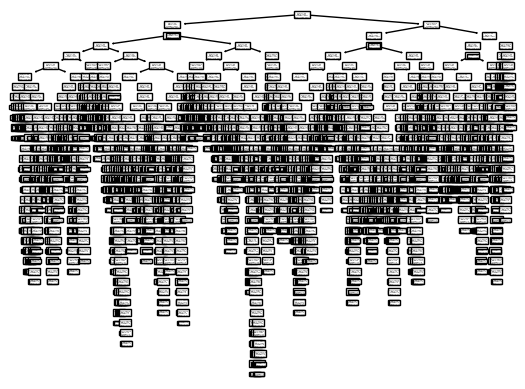

In [48]:
X = data.loc[:, data.columns != 'class']
y = data[['class']]
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

tree.plot_tree(clf)
print("Accuracy Default: ", metrics.accuracy_score(y_test, y_pred))


Accuracy Apx 1:  0.7233333333333334


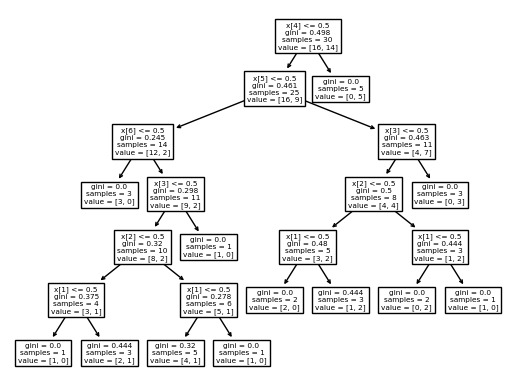

In [49]:
clf_apx1 = tree.DecisionTreeClassifier()
clf_apx1 = clf_apx1.fit(X_train_s, y_train_s)

y_pred = clf_apx1.predict(X_medium)

tree.plot_tree(clf_apx1)
print("Accuracy Apx 1: ", metrics.accuracy_score(y_medium, y_pred))

Accuracy Approx:  0.6466666666666666


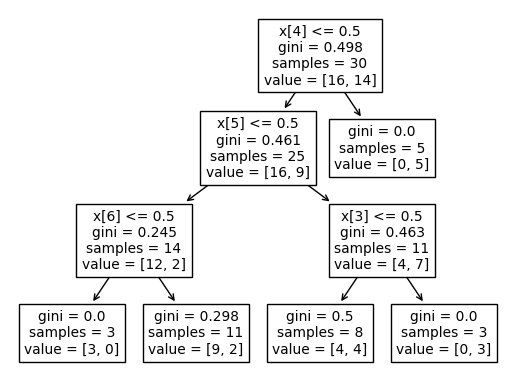

In [60]:
clf_apx2 = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)
clf_apx2 = clf_apx2.fit(X_train_s, y_train_s)

y_pred = clf_apx2.predict(X_medium)

tree.plot_tree(clf_apx2)
print("Accuracy Approx: ", metrics.accuracy_score(y_medium, y_pred))

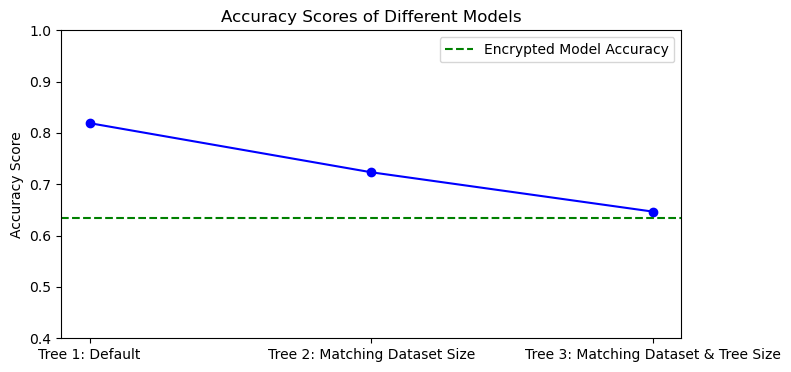

In [83]:
models = ['Tree 1: Default', 'Tree 2: Matching Dataset Size', 'Tree 3: Matching Dataset & Tree Size']
accuracy_scores = [0.8191027496382055, 0.7233333333333334, 0.6466666666666666]

enc_constant = 0.6333333333333333

plt.figure(figsize=(8, 4))
plt.plot(models, accuracy_scores, marker='o', color='blue')
plt.axhline(y=enc_constant, color='green', linestyle='--', label='Encrypted Model Accuracy')

# plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Models')

plt.ylim(0.4,1)
plt.legend()
plt.show()

In [10]:
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout

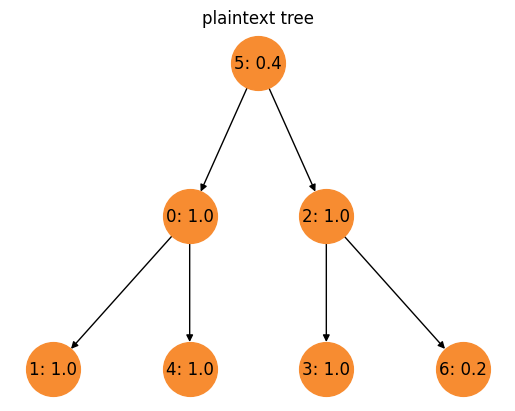

In [17]:
g = nx.DiGraph()
g.add_node("5: 0.4")
g.add_node("0: 1.0")
g.add_node("2: 1.0")
g.add_edge("5: 0.4", "0: 1.0")
g.add_edge("5: 0.4", "2: 1.0")
g.add_node("1: 1.0")
g.add_node("4: 1.0")
g.add_node("3: 1.0")
g.add_node("6: 0.2")
g.add_edge("0: 1.0", "1: 1.0")
g.add_edge("0: 1.0", "4: 1.0")
g.add_edge("2: 1.0", "3: 1.0")
g.add_edge("2: 1.0", "6: 0.2")

write_dot(g, 'pt_tree.dot')
plt.title("plaintext tree")
pos = graphviz_layout(g, prog='dot')
nx.draw(g, pos, with_labels=True, node_color="#f78c31", node_size=1500)